# Airline tweets dataset exploration

#### Data set obtained from Kaggle.com
#### By Gautam Borgohain 
#### Feb 2016
All suggestions are welcome

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
# pd.options.display.max_columns = 60
pd.options.display.max_rows = 10
pd.options.display.notebook_repr_html = True
pd.options.display.max_columns = None
df = pd.read_csv('/Users/gautamborgohain/Downloads/airline-twitter-sentiment/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Analysis temporal trend in the data

This data set contains sentiment-classified tweets directed at 6 airlines.
Do not know what airline_sentiment_gold and negative_reason_gold represent.

Tweet time, content and coordinate information is available.

First, lets convert the the tweet_created column to datetime

In [3]:

timedf = df.copy()
timedf['tweet_created'] = pd.to_datetime(timedf['tweet_created'])
timedf.dtypes

tweet_id                                 int64
airline_sentiment                       object
airline_sentiment_confidence           float64
negativereason                          object
negativereason_confidence              float64
                                     ...      
text                                    object
tweet_coord                             object
tweet_created                   datetime64[ns]
tweet_location                          object
user_timezone                           object
dtype: object

Now, seperate out some time information to plot out trends.
year, month, dayofyear are not useful as the data is of only one year (2015), one month (Feb) and span over 8-9 days.

The weekday and hour of day values might reveal some trend in the data.

In [6]:
timedf['year'] = [x.year for x in timedf['tweet_created']]
timedf['month'] = [x.month for x in timedf['tweet_created']]
timedf['dayofweek'] = [x.dayofweek for x in timedf['tweet_created']]
timedf['dayofyear'] = [x.dayofyear for x in timedf['tweet_created']]
timedf['hour'] = [x.hour for x in timedf['tweet_created']]

timedf.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,year,month,dayofweek,dayofyear,hour
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 19:35:52,NaN,Eastern Time (US & Canada),2015,2,1,55,19
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 19:15:59,NaN,Pacific Time (US & Canada),2015,2,1,55,19
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 19:15:48,Lets Play,Central Time (US & Canada),2015,2,1,55,19
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 19:15:36,NaN,Pacific Time (US & Canada),2015,2,1,55,19
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 19:14:45,NaN,Pacific Time (US & Canada),2015,2,1,55,19


Need to check for overlapping days of week before analysis

In [7]:
pd.crosstab(timedf['dayofyear'],timedf['dayofweek'])

dayofweek,0,1,2,3,4,5,6
dayofyear,,,,,,,
48,0,953,0,0,0,0,0
49,0,0,1416,0,0,0,0
50,0,0,0,1298,0,0,0
51,0,0,0,0,1512,0,0
52,0,0,0,0,0,1418,0
53,0,0,0,0,0,0,2392
54,3515,0,0,0,0,0,0
55,0,2136,0,0,0,0,0


So it appears Tuesday has got 'unfair' representation in the data compared to other days of the week.
But lets carry on keeping this in mind. So first, the day of week distribution of the sentiments. 

In [22]:
daybysent = pd.crosstab(timedf['airline_sentiment'], timedf['dayofweek']).transpose()
daybysent

airline_sentiment,negative,neutral,positive
dayofweek,,,
0,2346,711,458
1,1845,716,528
2,827,304,285
3,666,346,286
4,849,383,280
5,901,272,245
6,1744,367,281


The percentage distribution can be calculated so that we can see what percentage of the negative tweets were tweeted on Monday,Tuesday and so on..

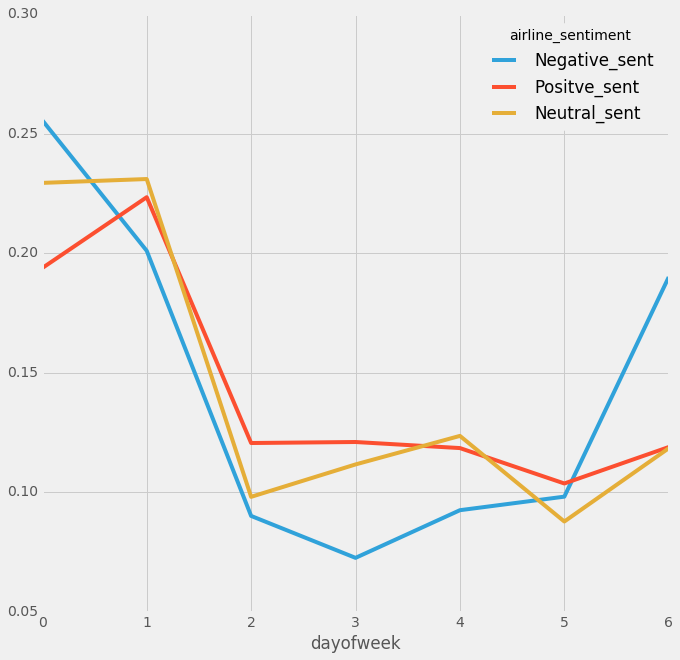

In [23]:
daybysent['Negative_sent'] = daybysent['negative']/sum(daybysent['negative'])
daybysent['Positve_sent'] = daybysent['positive']/sum(daybysent['positive'])
daybysent['Neutral_sent'] = daybysent['neutral']/sum(daybysent['neutral'])
daybysent.drop(daybysent.columns[0:3], axis = 1, inplace=True)
daybysent.plot(kind = "line", figsize = (10,10))

The line plot reveals an interesting trend that Mondays and Sundays are the only two days when a larger proportion of the tweets are negative. On all other days of the week the majority of sentiment is either positive or neutral. Midweek seems to be a good time for the airline companies as the sentiment is largly positive.

This maybe due to people travelling on Sundays and Mondays on business trips. Even though we have data for two Tuesdays  compared to one of all other weeks, the percentage distribution of the rest of the week is unaffected. Obviously hypothesis cannot be made from just a week data but this trend mught help while prediction

In [24]:
hourbysent = pd.crosstab(timedf['airline_sentiment'], timedf['hour']).transpose()
hourbysent

airline_sentiment,negative,neutral,positive
hour,,,
0,463,152,119
1,451,161,142
2,477,143,131
3,482,102,91
4,389,114,99
...,...,...,...
19,572,260,154
20,485,197,142
21,560,190,150


Similarly, get the hour-wise distribution of the sentiment.

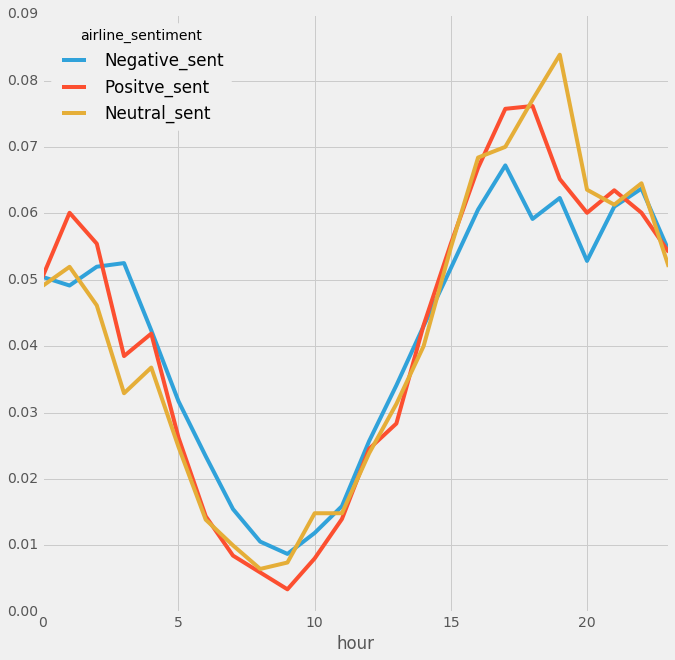

In [25]:
hourbysent['Negative_sent'] = hourbysent['negative']/sum(hourbysent['negative'])
hourbysent['Positve_sent'] = hourbysent['positive']/sum(hourbysent['positive'])
hourbysent['Neutral_sent'] = hourbysent['neutral']/sum(hourbysent['neutral'])
hourbysent.drop(hourbysent.columns[0:3], axis = 1, inplace=True)
hourbysent.plot(kind = "line", figsize = (10,10))

So in this plot we can see that the morning and the evening hours are the prime times for negative tweets .

## Uni and Bivariate analysis of the dataset
Lets check how much of the data is negative, positive and neutral

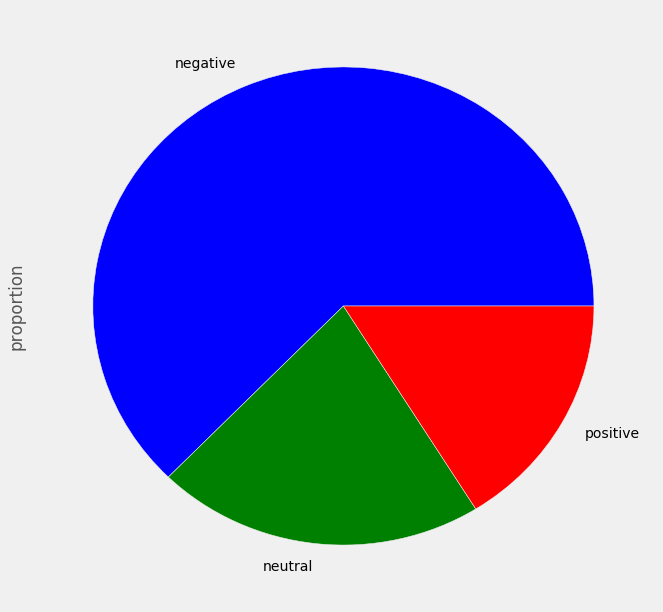

In [26]:
pd.options.display.max_rows = 10
sentfreqdf = pd.DataFrame(df['airline_sentiment'].value_counts())
sentfreqdf['proportion'] = sentfreqdf['airline_sentiment']/sum(sentfreqdf['airline_sentiment'])
sentfreqdf['proportion'].plot(kind = "pie", figsize = (10,10))

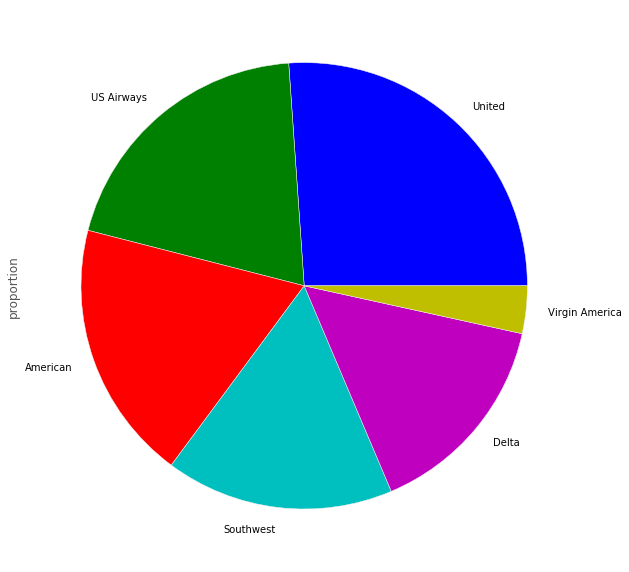

In [13]:
airdf = pd.DataFrame(df['airline'].value_counts())
airdf['proportion'] = airdf['airline']/sum(airdf['airline'])
airdf['proportion'].plot(kind = "pie", figsize = (10,10))

Distribution of the tweets by Airlines

Checking Airline by Sentiment crosstab and getting the percentage data. 

In [14]:
df.pivot_table(index='airline_sentiment', columns = 'airline', aggfunc=len)['tweet_id']

airline,American,Delta,Southwest,US Airways,United,Virgin America
airline_sentiment,,,,,,
negative,1960,955,1186,2263,2633,181
neutral,463,723,664,381,697,171
positive,336,544,570,269,492,152


In [15]:
airbysentdf = pd.crosstab(df['airline_sentiment'],df['airline'])
airbysentdf['American_Airlines'] = airbysentdf['American']/sum(airbysentdf['American'])
airbysentdf['Delta_Airlines'] = airbysentdf['Delta']/sum(airbysentdf['Delta'])
airbysentdf['Southwest_Airlines'] = airbysentdf['Southwest']/sum(airbysentdf['Southwest'])
airbysentdf['US Airways_Airlines'] = airbysentdf['US Airways']/sum(airbysentdf['US Airways'])
airbysentdf['United_Airlines'] = airbysentdf['United']/sum(airbysentdf['United'])
airbysentdf['Virgin America_Airlines'] = airbysentdf['Virgin America']/sum(airbysentdf['Virgin America'])
airbysentdf.drop(airbysentdf.columns[0:6],axis = 1, inplace=True)
airbysentdf

airline,American_Airlines,Delta_Airlines,Southwest_Airlines,US Airways_Airlines,United_Airlines,Virgin America_Airlines
airline_sentiment,,,,,,
negative,0.710402,0.429793,0.490083,0.776862,0.688906,0.359127
neutral,0.167814,0.325383,0.274380,0.130793,0.182365,0.339286
positive,0.121783,0.244824,0.235537,0.092345,0.128728,0.301587


This gives us an idea on what percentage of the tweets towards American Airlines and others, are negative, positive and neutral.

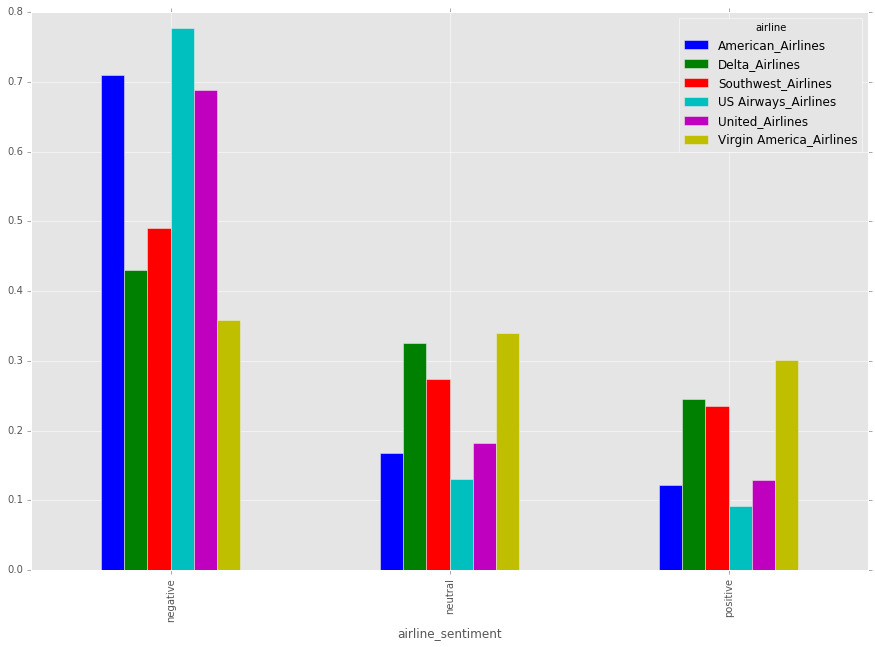

In [16]:
airbysentdf.plot(kind = "bar",figsize = (15,10))

Plot a stacke bar for better visualization

matplotlib.axes._subplots.AxesSubplot

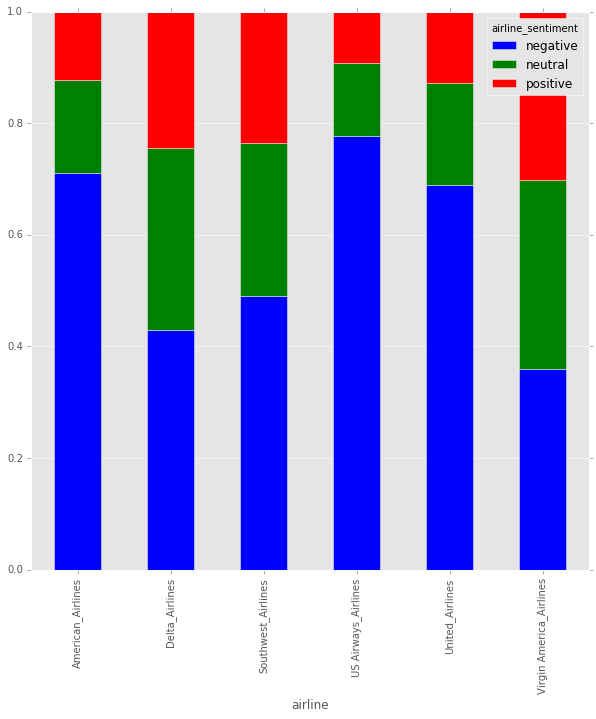

In [17]:
airsentplot = airbysentdf.transpose().plot(kind = "bar",stacked = True,figsize=(10,10))
type(airsentplot)

It appears Delta, Southwest and Virgin America airlines have a better performance in terms of positive sentiment in Twitter than the others, with proportion for negative tweets below 50%

## Observing reason for the negative sentiment

There are some prdefined reasons that are provided in the dataset which can be used to analyze the shortcomings of the airlines.

In [18]:
df['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [19]:
reasonbyairdf  = pd.crosstab(df['airline'],df['negativereason'])
reasonbyairdf = reasonbyairdf.transpose()

reasonbyairdf

airline,American,Delta,Southwest,US Airways,United,Virgin America
negativereason,,,,,,
Bad Flight,87,64,90,104,216,19
Can't Tell,198,186,159,246,379,22
Cancelled Flight,246,51,162,189,181,18
Customer Service Issue,768,199,391,811,681,60
Damaged Luggage,12,11,14,11,22,4
Flight Attendant Complaints,87,60,38,123,168,5
Flight Booking Problems,130,44,61,122,144,28
Late Flight,249,269,152,453,525,17
Lost Luggage,149,57,90,154,269,5


The cross tab of the reasons with the airlines and getting the percentage distribution. This gives us the percentage of negative tweets of American airlines and others, which were due to bad flight, cancelled flight and so on.

In [20]:
reasonbyairdf['American_Airlines'] = reasonbyairdf['American']/sum(reasonbyairdf['American'])
reasonbyairdf['Delta_Airlines'] = reasonbyairdf['Delta']/sum(reasonbyairdf['Delta'])
reasonbyairdf['Southwest_Airlines'] = reasonbyairdf['Southwest']/sum(reasonbyairdf['Southwest'])
reasonbyairdf['US Airways_Airlines'] = reasonbyairdf['US Airways']/sum(reasonbyairdf['US Airways'])
reasonbyairdf['United_Airlines'] = reasonbyairdf['United']/sum(reasonbyairdf['United'])
reasonbyairdf['Virgin America_Airlines'] = reasonbyairdf['Virgin America']/sum(reasonbyairdf['Virgin America'])
reasonbyairdf.drop(reasonbyairdf.columns[0:6],axis = 1, inplace=True)
reasonbyairdf

airline,American_Airlines,Delta_Airlines,Southwest_Airlines,US Airways_Airlines,United_Airlines,Virgin America_Airlines
negativereason,,,,,,
Bad Flight,0.044388,0.067016,0.075885,0.045957,0.082036,0.104972
Can't Tell,0.101020,0.194764,0.134064,0.108705,0.143942,0.121547
Cancelled Flight,0.125510,0.053403,0.136594,0.083517,0.068743,0.099448
Customer Service Issue,0.391837,0.208377,0.329680,0.358374,0.258640,0.331492
Damaged Luggage,0.006122,0.011518,0.011804,0.004861,0.008355,0.022099
Flight Attendant Complaints,0.044388,0.062827,0.032040,0.054353,0.063806,0.027624
Flight Booking Problems,0.066327,0.046073,0.051433,0.053911,0.054690,0.154696
Late Flight,0.127041,0.281675,0.128162,0.200177,0.199392,0.093923
Lost Luggage,0.076020,0.059686,0.075885,0.068051,0.102165,0.027624


numpy.ndarray

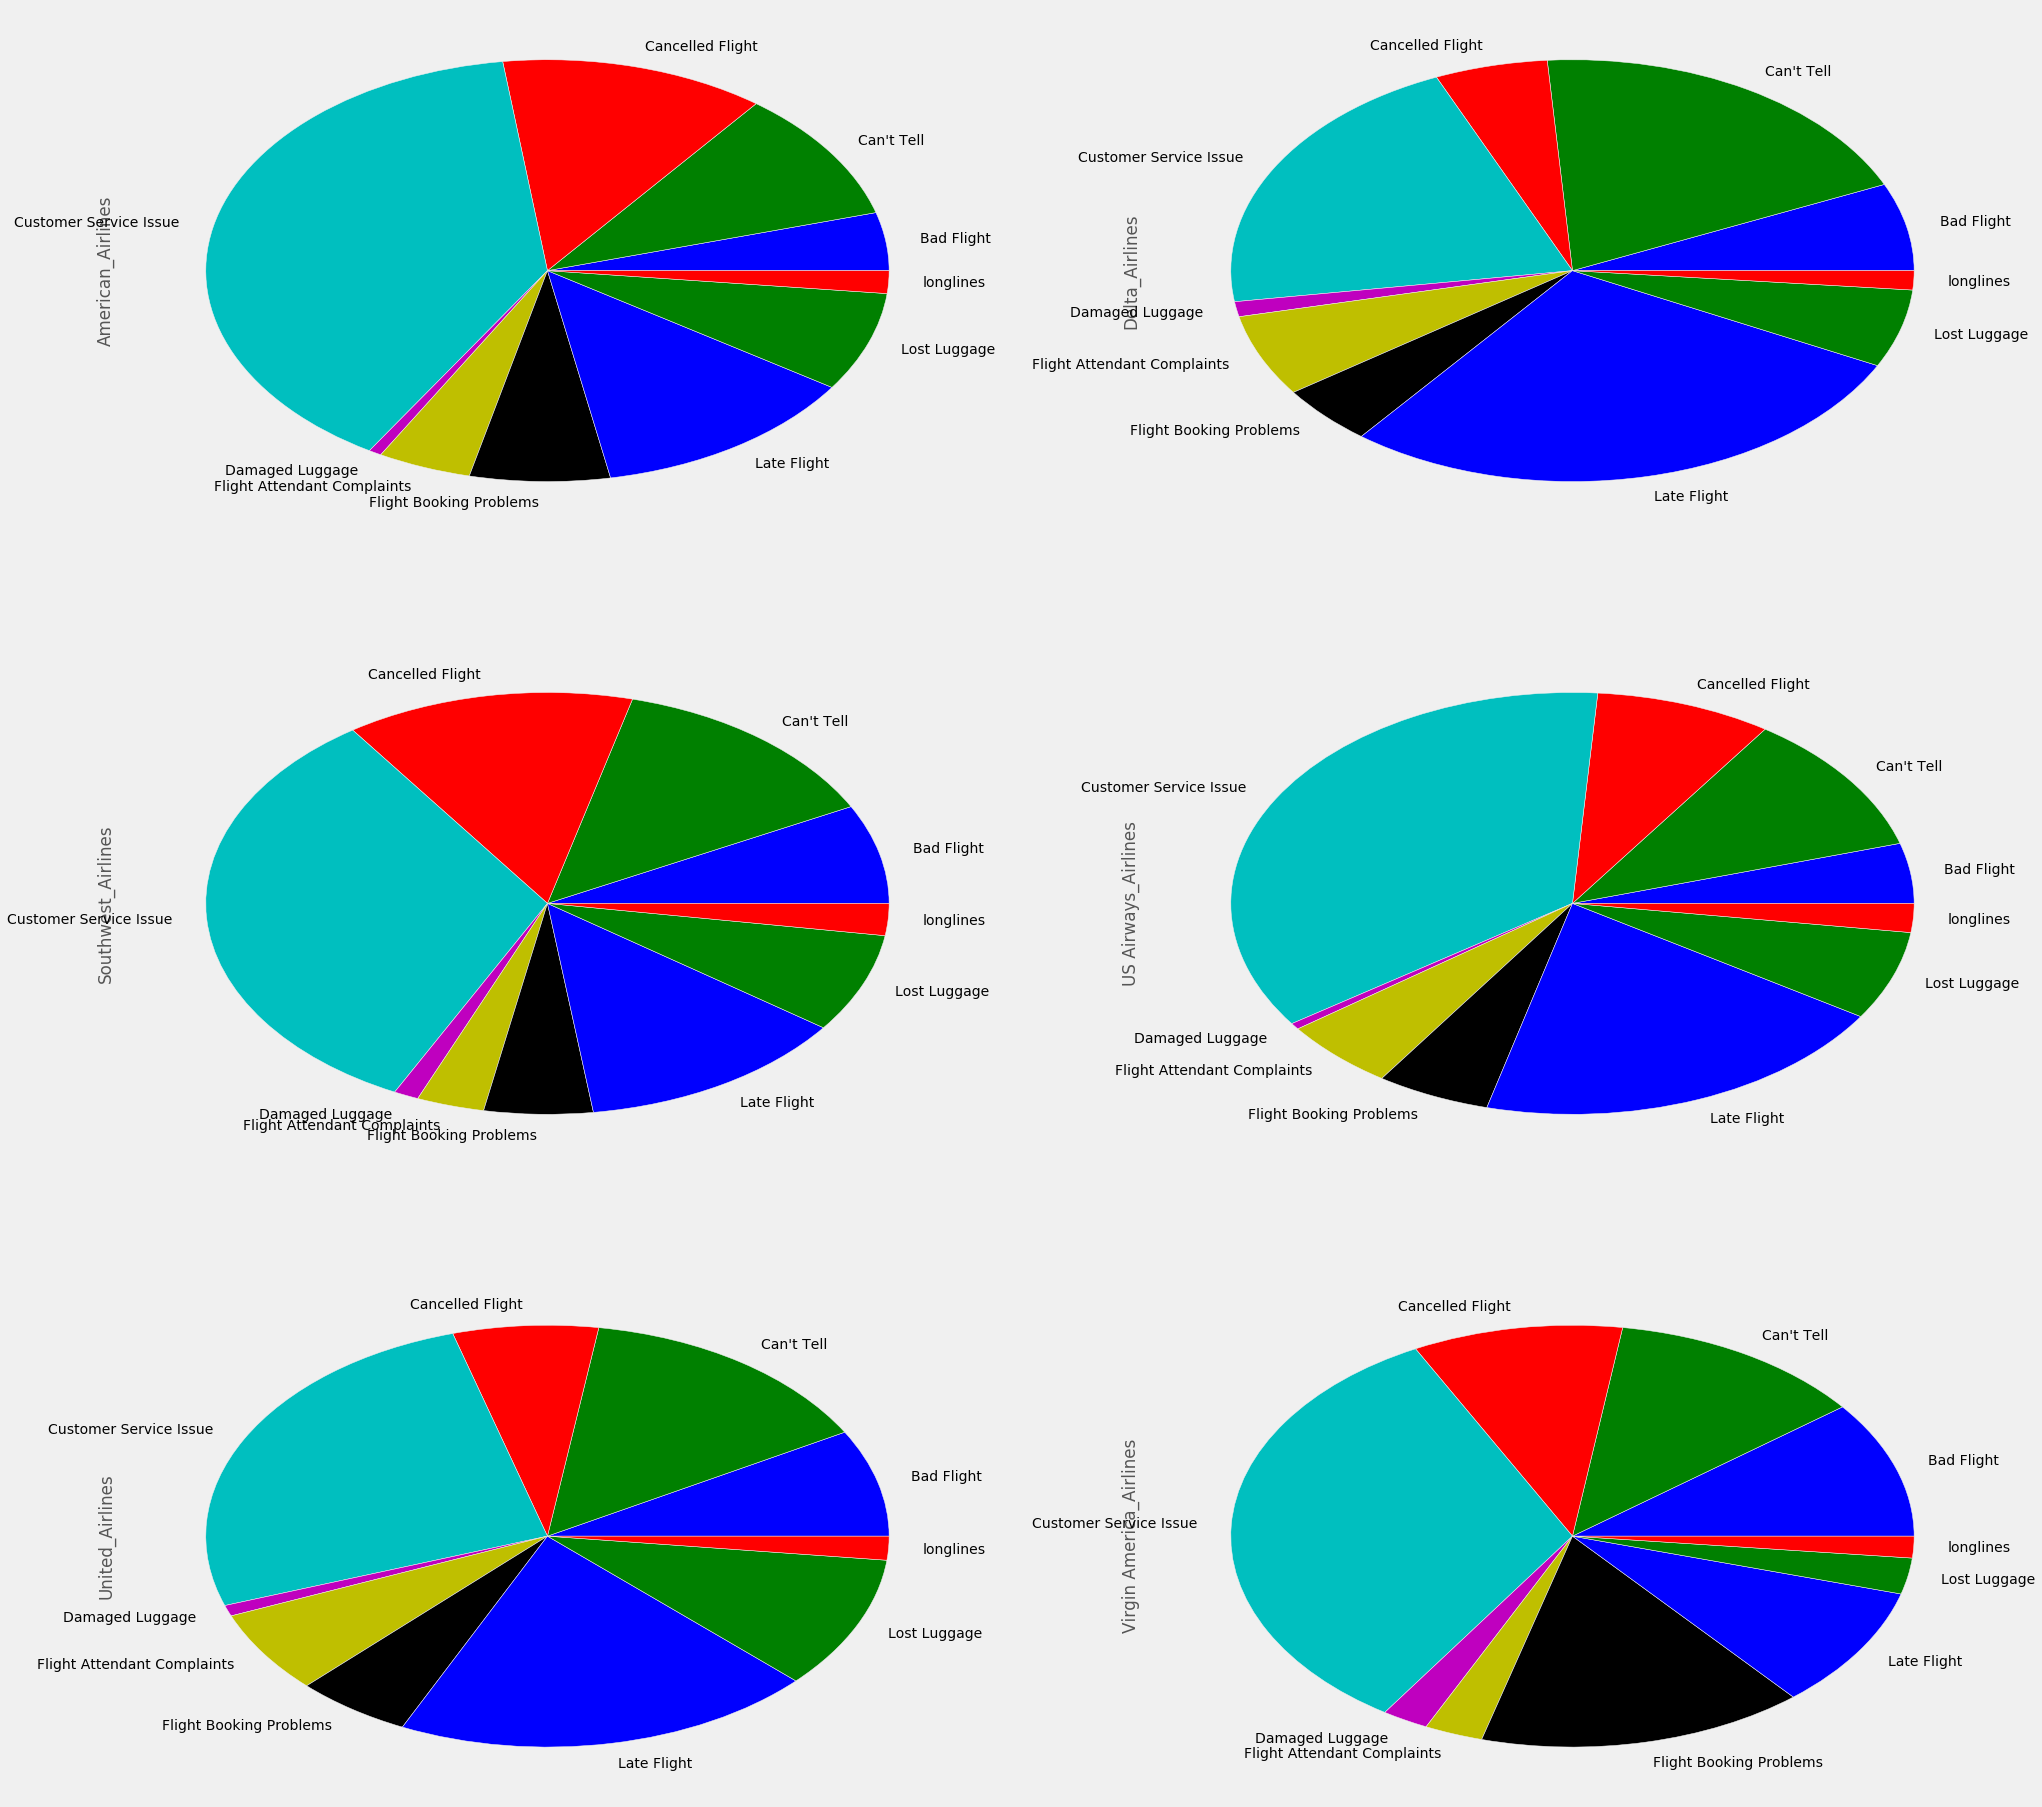

In [21]:
matplotlib.style.use('fivethirtyeight')
finalplot = reasonbyairdf.plot(kind = "pie" ,subplots = True, layout = (3,2),figsize = (30,30),legend = False)
type(finalplot)

Finally, plotting the pie charts for all the airlines we can see what are the main reasons affecting the airlines. All of the six airline companies have customer service issues. It seems to be the worst metric for American airlines.